## Modeling Part 2

Here we shall be modeling the dataset based on KNN, XGBoost and then will be calculating the results in form of confusion matrix and classification report. 

In [3]:
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import xgboost as xgb
import seaborn as sns

In [2]:
df = pd.read_csv("../dataset/merged.csv")
df.drop(columns=["Time(ms)"], inplace=True)
df

,ankle_acc_hor_forward,ankle_acc_ver,ankle_acc_hor_lateral,upper_leg_acc_hor_forward,upper_leg_acc_ver,upper_leg_acc_hor_lateral,trunk_acc_hor_forward,trunk_acc_ver,trunk_acc_hor_lateral,annotation
0,-40,970,326,-36,962,242,320,657,349,0
1,-60,990,316,54,953,262,77,914,446,0
2,-111,980,346,-27,953,262,-48,857,446,0
3,-111,980,346,36,981,232,-38,800,446,0
4,-60,1009,346,18,972,242,77,866,436,0
...,...,...,...,...,...,...,...,...,...,...
1021876,-212,1000,376,690,-166,282,77,942,349,1
1021877,-232,970,356,572,-55,10,67,961,339,1
1021878,-232,970,356,272,92,-70,97,961,359,1
1021879,-252,921,346,354,18,-171,87,952,359,1


10
11
12
13
14


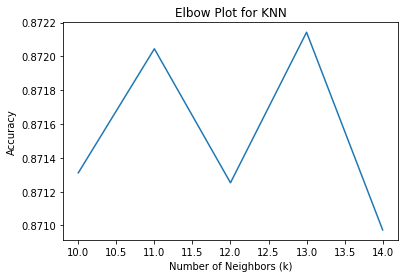

In [6]:
x = df.drop(columns=["annotation"])
y = df["annotation"]
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)
k_range = range(10,15)
accuracy_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    print(k)
plt.plot(k_range, accuracy_scores)
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('Elbow Plot for KNN')
plt.show()

In [7]:
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 49715   7837    411]
 [  5987 122332   2822]
 [   779   8295   6199]]
              precision    recall  f1-score   support

           0       0.88      0.86      0.87     57963
           1       0.88      0.93      0.91    131141
           2       0.66      0.41      0.50     15273

    accuracy                           0.87    204377
   macro avg       0.81      0.73      0.76    204377
weighted avg       0.87      0.87      0.87    204377



In [12]:
dtrain = xgb.DMatrix(x_train, label=y_train)
dtest = xgb.DMatrix(x_test, label=y_test)
params = {
    'max_depth': 500,
    'learning_rate': 0.01,
    'objective': 'multi:softmax',
    'num_class': 3
}
num_rounds = 50
model = xgb.train(params, dtrain, num_rounds)
y_pred = model.predict(dtest)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[13:30:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softmax' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[ 48134   9134    695]
 [  6036 121120   3985]
 [   766   8417   6090]]
              precision    recall  f1-score   support

           0       0.88      0.83      0.85     57963
           1       0.87      0.92      0.90    131141
           2       0.57      0.40      0.47     15273

    accuracy                           0.86    204377
   macro avg       0.77      0.72      0.74    204377
weighted avg       0.85      0.86      0.85    204377



## Interpretation of the model results

We have worked with various algorithms such as :

1. Logistic Regression
2. Decision Tree
3. Random Forest
4. KNN
5. XGBoost

Best Results from each model experimentation are as follows :

1. Logistic Regression

              precision    recall  f1-score   support

           0       0.62      0.17      0.26     57963
           1       0.66      0.95      0.78    131141
           2       0.23      0.01      0.02     15273

    accuracy                           0.66 
    
2. Decision Tree


                precision    recall  f1-score   support

           0       0.80      0.81      0.81     57963
           1       0.87      0.86      0.87    131141
           2       0.41      0.43      0.42     15273

    accuracy                           0.81
    
3. Random Forest

                precision    recall  f1-score   support

           0       0.92      0.83      0.87     57963
           1       0.87      0.96      0.91    131141
           2       0.72      0.35      0.47     15273

    accuracy                           0.88 
    
4. KNN

                precision    recall  f1-score   support

           0       0.88      0.86      0.87     57963
           1       0.88      0.93      0.91    131141
           2       0.66      0.41      0.50     15273

    accuracy                           0.87
    
5. XGBoost
                 precision    recall  f1-score   support

           0       0.88      0.83      0.85     57963
           1       0.87      0.92      0.90    131141
           2       0.57      0.40      0.47     15273

    accuracy                           0.86

From the above results we can clearly see that KNN is giving us the most stable model with the category 2 recall and precision values of 41% and 66% respectively. But since KNN is not productionable as it takes a lot of time to produce results, we wont be using this algorithm further. Followed by XGBoost, Decision Tree and Random Forest, though the recall value is still not up to mark. It is due to the class imbalance problem, i.e. category 2 has very less data as compared to other two categories. Therefore in order to solve this problem, we will be using Oversampling technique such as Borderline SMOTE and shall retrain the models with the new dataset obtained.

<AxesSubplot:xlabel='annotation', ylabel='count'>

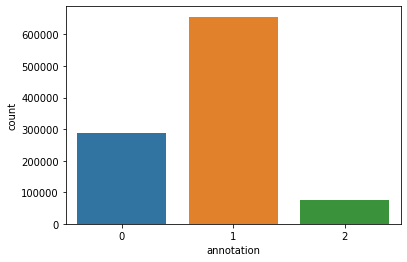

In [4]:
sns.countplot(x = 'annotation', data=df)